In [1]:
import cv2
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [2]:
def save_npy(image, annotation, base_dir, name):
    if image.max() > 1:
        image = (image/255).astype(np.float16)
#     print(annotation)
    annotation = annotation.astype(np.float16)
#     fnl = np.concatenate((image, annotation), 2)
#     np.save(base_dir + 'parsed/' + name, fnl)
    np.savez_compressed(base_dir + 'parsed/' + name, img = image, anno = annotation)

In [14]:
def parse_annotations(base_dir):
    count = 1
    for file in os.listdir(base_dir):
        if '.jpg' in file:   
            print('Processing file {}'.format(count), end='\r')
            count += 1
            file_name = file[0:-4]
            img = cv2.imread(base_dir + file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            anno = None
            with open(base_dir + file_name + '.json', 'r') as read_file:
                anno = json.loads(read_file.read())
            label = np.zeros((240, 320, 6), np.int8)
            for s in anno['shapes']:
                idx = int(s['label'])
                pts = []
                for p in s['points']:
                    pts.append(np.array([np.array(p)]))
                pts = np.array(pts)
                temp = np.zeros((240, 320))
                cv2.drawContours(temp, [pts.astype('int')], 0, 1, -1)
                label[:, :, idx] = temp
            tmp = np.ones((240, 320))
            for i in range(5):
                tmp -= label[:, :, i]
            label[:, :, -1] = np.clip(tmp, 0, 1)
            save_npy(img, label, base_dir, file_name)
#             break

In [15]:
parse_annotations('./Khoi - 1/')

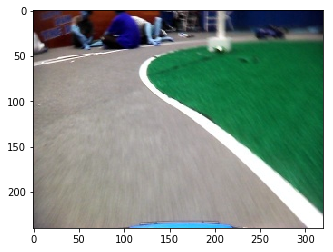

In [5]:
plt.imshow(cv2.imread('./Khoi - 1/1558737199.9_15.0_-54.794.jpg'))

In [16]:
temp = np.load('./Khoi - 1/' + 'parsed/1558737199.9_15.0_-54.794.npz')

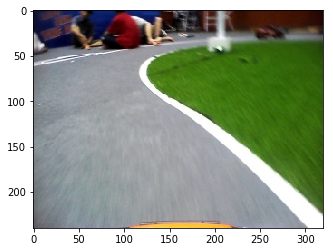

In [17]:
plt.imshow(temp['img'].astype('float'))

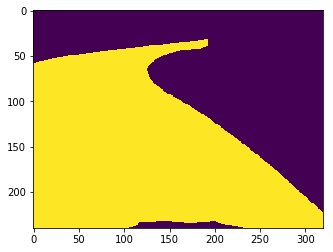

In [20]:
plt.imshow(temp['anno'][:, :, 0].astype('float'))